In [1]:
#%% import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 
plt.rcParams.update({'font.size': 18})

In [15]:
step = 12
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.65_cons_load_highT_hdf5/solution/solution-000'+str(step).zfill(2)+ '.h5'
f_l = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(step).zfill(2)+ '.h5'
f_ul = h5py.File(path, 'r')

print ('output variables:', f_ul.keys())
path_xy = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_unload_load_highT_hdf5/solution/mesh-00000.h5'
mesh =h5py.File(path_xy, 'r')
#node in x, y, z
x = mesh['nodes'][:,0]
y = mesh['nodes'][:,1]
mf_ul = f_ul['melt_fraction'][:,0]
mf_l = f_l['melt_fraction'][:,0]
strain_rate = f_ul['strain_rate'][:,0]
diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]

diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
p_l= f_l['p'][:,0]
p_ul = f_ul['p'][:,0]
t = f_ul['T'][:,0]

output variables: <KeysViewHDF5 ['T', 'adiabatic_heating', 'compositional_heating', 'crust_lower', 'crust_upper', 'current_cohesions', 'current_friction_angles', 'density', 'latent_heat', 'mantle_lithosphere', 'melt_fraction', 'nonadiabatic_pressure', 'nonadiabatic_temperature', 'noninitial_plastic_strain', 'p', 'plastic_strain', 'plastic_yielding', 'principal_stress_1', 'principal_stress_2', 'principal_stress_direction_1', 'principal_stress_direction_2', 'shear_heating', 'shear_stress_xx', 'shear_stress_xy', 'shear_stress_yx', 'shear_stress_yy', 'strain_rate', 'stress_xx', 'stress_xy', 'stress_yx', 'stress_yy', 'velocity', 'viscosity']>


<a list of 4 text.Text objects>

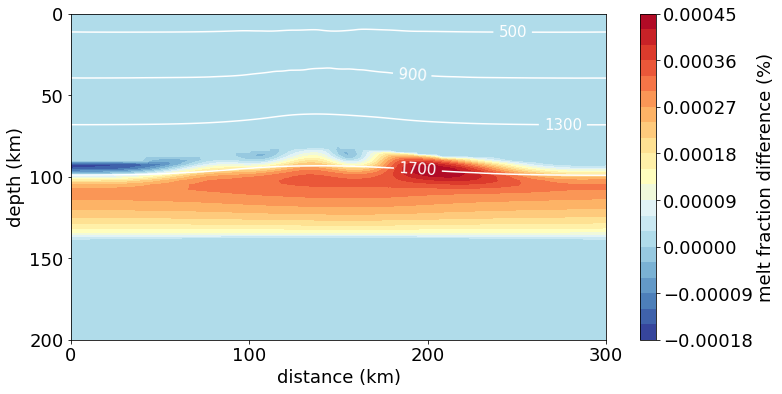

In [16]:
fig,ax = plt.subplots(figsize=(12,6))

ax1 = plt.tricontour(x, y, t, colors=['white'], levels = [500, 900, 1300, 1700])
plt.tricontourf(x, y, diff_mf,cmap='RdYlBu_r', levels = 20)
plt.colorbar(label = 'melt fraction difference (%)')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')

ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([0, 100,200, 300 ])

ax.set_yticks([0, 50000, 100000, 150000, 200000])
ax.set_yticklabels([200, 150,100, 50, 0 ])
plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

<a list of 4 text.Text objects>

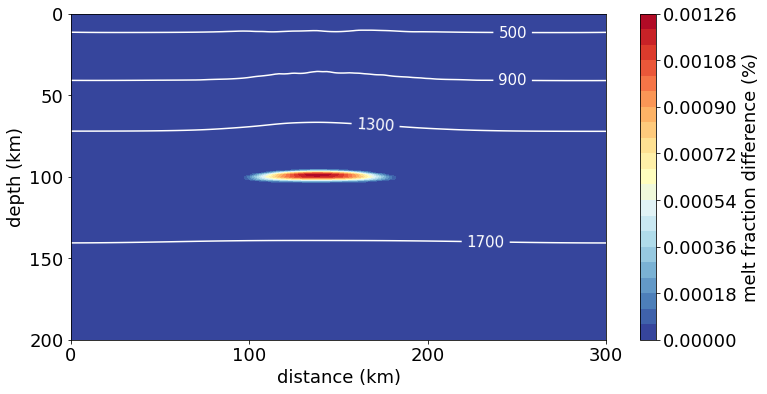

In [163]:
fig,ax = plt.subplots(figsize=(12,6))

ax1 = plt.tricontour(x, y, t, colors=['white'], levels = [500, 900, 1300, 1700])
plt.tricontourf(x, y, mf_l,cmap='RdYlBu_r', levels = 20)
plt.colorbar(label = 'melt fraction difference (%)')
plt.xlabel('distance (km)')
plt.ylabel('depth (km)')

ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([0, 100,200, 300 ])

ax.set_yticks([0, 50000, 100000, 150000, 200000])
ax.set_yticklabels([200, 150,100, 50, 0 ])
plt.clabel(ax1, fontsize=15, inline=1,fmt = '%1.0f')

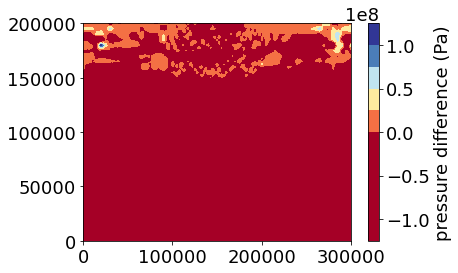

In [176]:
plt.tricontourf(x, y, diff_nonad_p,cmap='RdYlBu', vmax= 1e8, vmin = -1e7, levels = 10)
plt.colorbar(label = 'pressure difference (Pa)')

In [170]:
# Melt Calculation
#refined cell size x: 1250m y: 1250m
cell_v= 1250*1250 #m^2
# length of lake
length = 260e3 #m
melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
diff_melt_v_l = sum([x*cell_v for x in diff_mf])
diff_melt_v_l*length*1e-9 # in km^3

24.489152240058623

In [101]:
diff_melt_v_l_1ma = []
melt_v_l_1ma = []
melt_v_unl_1ma = []
for t in range(25):
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')


    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
    diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
    p_l= f_l['p'][:,0]
    p_ul = f_ul['p'][:,0]
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l_1ma.append(melt_v_l*length*1e-9)
    melt_v_unl_1ma.append(sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])*length*1e-9)

    diff_melt_v_l_1ma.append (diff_melt_v_l*length*1e-9)

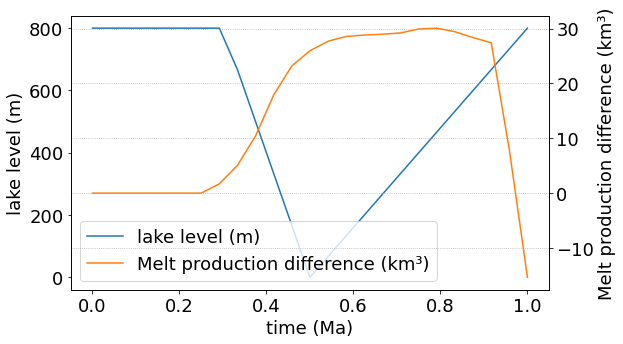

In [77]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),diff_melt_v_l_1ma, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('Melt production difference (km\u00b3)')
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 'lower left')
plt.grid(linestyle='dotted')
plt.tight_layout()



In [106]:
diff_melt_v_l_1ma = []
melt_v_l_1ma = []
melt_v_unl_1ma = []
for t in range(25):
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')


    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
    diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
    p_l= f_l['p'][:,0]
    p_ul = f_ul['p'][:,0]
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l_1ma.append(melt_v_l*length*1e-9)
    melt_v_unl_1ma.append(sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])*length*1e-9)

    diff_melt_v_l_1ma.append (diff_melt_v_l*length*1e-9)

In [18]:
# lake level calculation
time = np.linspace(0, 1, 25)
# note that the time here in unit of Ma
ll = [0]*25
for i, t in enumerate(time):
    if t<0.3:
        ll[i] = 8e2
    elif t<0.5:
        ll[i] = -4000*t+2000
    else:
        ll[i] = 1600*t-800

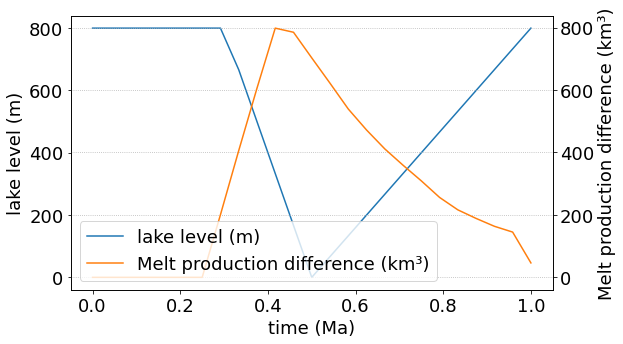

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),diff_melt_v_l_1ma, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('Melt production difference (km\u00b3)')
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'lower left')
plt.grid(linestyle='dotted')
plt.tight_layout()

In [25]:
max_l_mf = []
max_ul_mf = []
max_l_mf_ht= []
max_ul_mf_ht= []
melt_v_l_1ma = []
melt_v_ul_1ma = []
diff_melt_v_l_1ma = []
t= 10
for t in range(25):
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.65_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_cons_load_highT_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
#     f_l = h5py.File(path, 'r')
#     path = '/home/lxue07/Documents/aspect/rifting/'\
#     'output-test-from-extension_2.64_unload_load_highT_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
#     f_ul = h5py.File(path, 'r')
    
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(t).zfill(2)+ '.h5'
    f_l = h5py.File(path, 'r')
    path = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(t).zfill(2)+ '.h5'
    f_ul = h5py.File(path, 'r')
    
    
    path_xy = '/home/lxue07/Documents/aspect/rifting/'\
    'output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
    mesh =h5py.File(path_xy, 'r')
    #node in x, y, z
    x = mesh['nodes'][:,0]
    y = mesh['nodes'][:,1]

    diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
    diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
    diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
    p_l= f_l['p'][:,0]
    p_ul = f_ul['p'][:,0]
    
    max_l_mf_ht.append(max(f_l['melt_fraction'][:,0]))
    max_ul_mf_ht.append(max(f_ul['melt_fraction'][:,0]))
    
    cell_v= 1250*1250 #m^2
    # length of lake
    length = 260e3 #m
    melt_v_l = sum([x*cell_v for x in f_l['melt_fraction'][:,0]])
    diff_melt_v_l = sum([x*cell_v for x in diff_mf])
    
    melt_v_l_1ma.append(melt_v_l*length*1e-9)
    melt_v_ul_1ma.append(sum([x*cell_v for x in f_ul['melt_fraction'][:,0]])*length*1e-9)

    diff_melt_v_l_1ma.append (diff_melt_v_l*length*1e-9)

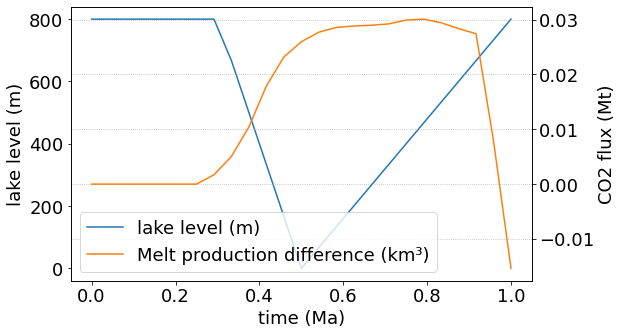

In [107]:
#co2 degassing:
#Ba: ol/liq: 1.000000e-09 ppm milligrams per liter (mg/L) = 1e9 g/km3
#ree = pd.read_csv('../table/Kelemen_2002.csv', sep = '\t')
#ree.head()
co2= [1e-03*v for v in diff_melt_v_l_1ma]
fig, ax = plt.subplots(figsize=(9,5))
ln1 = ax.plot(np.linspace(0, 1, 25), ll, label = 'lake level (m)')
ax.set_xlabel('time (Ma)')
ax.set_ylabel('lake level (m)')
ax2 = ax.twinx()
ln2 = ax2.plot(np.linspace(0, 1, 25),co2, c = 'C1', label = 'Melt production difference (km\u00b3)')
ax2.set_ylabel('CO2 flux (Mt)')
lns = ln1 +ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 'lower left')
plt.grid(linestyle='dotted')
plt.tight_layout()

In [93]:
ree.head(10)# vs/l

,element,ol/liq,opx/liq,cpx/liq,gar/liq,sp/liq,chondrite(ppm)
0,Ba,1.000000e-09,0.00001,0.00068,0.00001,0.0000,2.410
1,Th,1.000000e-09,0.00001,0.00100,0.00000,0.0000,0.029
2,U,1.000000e-09,0.00001,0.00300,0.00500,0.0000,0.008
3,K,1.000000e-09,0.00001,0.00720,0.00001,0.1000,545.000
4,Nb,1.000000e-03,0.00290,0.00770,0.01300,0.0100,0.246
5,La,7.000000e-06,0.00100,0.05360,0.00100,0.0006,0.237
6,Ce,1.000000e-05,0.00300,0.08580,0.00800,0.0006,0.612
7,Pb,1.000000e-05,0.00300,0.07200,0.00050,0.0000,2.470
8,Pr,4.000000e-05,0.00600,0.13000,0.03300,0.0006,0.095
9,Sr,1.000000e-05,0.00300,0.12800,0.00700,0.0000,7.260
